<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Общее-впечатление" data-toc-modified-id="Общее-впечатление-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><font color="orange">Общее впечатление</font></a></span></li><li><span><a href="#Общее-впечатление-(ревью-2)" data-toc-modified-id="Общее-впечатление-(ревью-2)-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span><font color="orange">Общее впечатление (ревью 2)</font></a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общие-выводы" data-toc-modified-id="Общие-выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общие выводы</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [46]:
# импортируем необходимые библиотеки Python для работы с данными и модели машинного обучения.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
pd.options.display.float_format = '{:,.1f}'.format

In [27]:
# откроем файл и выведем на экран основную информацию
try:
    data = pd.read_csv('/datasets/Churn.csv')
except:
    data = pd.read_csv('datasets/Churn.csv')
display(data.head())
display(data.describe(include='all').transpose())
display(data.info())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.0,1,1,1,"101,348.9",1
1,2,15647311,Hill,608,Spain,Female,41,1.0,"83,807.9",1,0,1,"112,542.6",0
2,3,15619304,Onio,502,France,Female,42,8.0,"159,660.8",3,1,0,"113,931.6",1
3,4,15701354,Boni,699,France,Female,39,1.0,0.0,2,0,0,"93,826.6",0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,"125,510.8",1,1,1,"79,084.1",0


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,"10,000.0",NaN,NaN,NaN,"5,000.5","2,886.9",1.0,"2,500.8","5,000.5","7,500.2","10,000.0"
CustomerId,"10,000.0",NaN,NaN,NaN,"15,690,940.6","71,936.2","15,565,701.0","15,628,528.2","15,690,738.0","15,753,233.8","15,815,690.0"
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,"10,000.0",NaN,NaN,NaN,650.5,96.7,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,"10,000.0",NaN,NaN,NaN,38.9,10.5,18.0,32.0,37.0,44.0,92.0
Tenure,"9,091.0",NaN,NaN,NaN,5.0,2.9,0.0,2.0,5.0,7.0,10.0
Balance,"10,000.0",NaN,NaN,NaN,"76,485.9","62,397.4",0.0,0.0,"97,198.5","127,644.2","250,898.1"
NumOfProducts,"10,000.0",NaN,NaN,NaN,1.5,0.6,1.0,1.0,1.0,2.0,4.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


None

На данном этапе видим, что всего в датасете 10000 записей. В столбце с информацией о времени, в течение которого человек является клиентом банка пропущено 909 записей. Далее данные строки будут изучены, будет выбран алгоритм заполнения пропусков и отсутствующие значения будут заполнены в соответствии с выбранным адгоритмом.

Также видим, что в датасете есть признаки, которые необходимо исключить из обучающего набора данных, так как они не отражают поведение клиента: RowNumber - с номером строки; CustomerId - с уникальным номером клиента;  Surname - с фамилией клиента. Данные столбцы будут удалены при подготовке данных для обучения моделей.

Далее разберем признаки:

<b>CreditScore</b>- кредитный рейтинг клиента. Формат данных целочисленный. Потребуется масштабирование признака.

<b>Geography</b>- здесь указана страна проживания клиента. Всего в данном признаке три уникальных значения, половину из которых составляет Франция. Данный признак необходимо преобразовать техникой прямого кодирования, избегая дамми-ловушку.

<b>Gender</b>- пол клиента. Здесь два уникальных значения. Также преобразуем его техникой прямого кодирования.

<b>Age</b>- возраст клиента. Формат целочисленный. Также потребуется масштабирование.

<b>Tenure</b>- сколько лет человек является клиентом банка. Требуется заполнить пропуски и масштабировать признак.

<b>Balance</b>- баланс на счете клиента. Формат данных вещественный. Потребуется масштабирование признака.

<b>NumOfProducts</b>- количество продуктов банка, используемых клиентом. Значение признака изменяется в интервале от 1 до 4. Требуется масштабирование признака.

<b>HasCrCard</b> и <b>IsActiveMember</b>- признаки с информацией о том, есть ли у клиента кредитная карта и проявляет ли он активность. В обоих признаках логический тип данных, поэтому необходимо преобразовать их техникой прямого кодирования.

<b>EstimatedSalary</b>- предполагаемая заработная плата клиента. Среднее и медиана очень близки, однако минимальное значение составляет всего 11,6. Необходимо проверить данный признак на наличие выбросов. В описании проекта не сказано, как определяется предполагаемая заработная плата. Если это какой-то алгоритм, то он не всегда может работать правильно, что может негативно сказаться на качестве предсказания моделей. В дальнейшем создадим два обучающих набора данных- с учетом данного признака и без его учета.

<b>Exited</b>- целевой признак, имеющий логический тип данных. Судя по среднему значению 0,2 в данном столбце, ушедших клиентов около 20%, поэтому потребуется борьба с дисбалансом целевого признака.

Приведем названия признаков к змеиному регистру.

In [28]:
data.columns = data.columns.str.lower()
data = data.rename(columns={'creditscore': 'credit_score', 'numofproducts': 'num_of_products', 'hascrcard': 'has_cr_card', 'isactivemember': 'is_active_member', 'estimatedsalary': 'estimated_salary'})

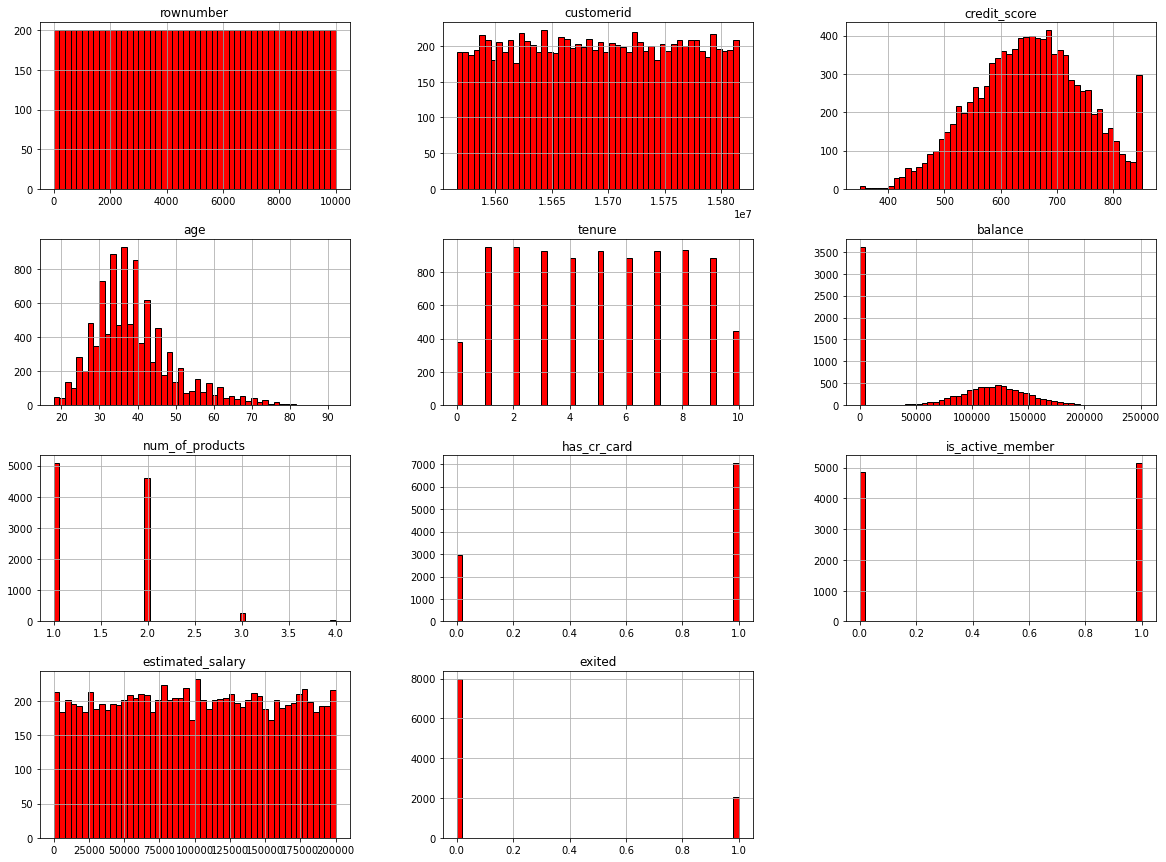

In [29]:
data.hist(bins=50, figsize=(20,15), color='r', edgecolor='black')
plt.show()

По распределениям признаков можно сделать следующие выводы: 

* распределение кредитного рейтинга имеет вид, близкий к нормальному, однако наблюдается некторое количество выбросов с максимальным значением рейтинга 850;
* возраст клиентов распределен нормально;
* срок пользования клиентами банковских продуктов распределен равномерно и снижен только для значений 0 и 10;
* больше трети клиентов не имеют средст на счете. Учитывая данный факт, далее проверим точность моделей на дополнительном обучающем наборе данных, преобразовав данный столбец в логический тип, отображающий, имеет ли клиент средства на счетах банка. Возможно, таким образом получится повысить точность предсказания моделей;
* почти все клиенты используют не более 2 банковских продуктов;
* 70% клиентов имеют кредитную карту;
* активность проявляют немногим больше половины клиентов;
* ожидаемая заработная плата распределена равномерно. Скорее всего, наличие данного признака в обучающем наборе будет лишь ухудшать точность модели. В дальнейшем необходимо проверить данную гипотезу;
* около 20% клиентов прекратили пользоваться банком. Так как действующих клиентов в 4 раза больше, потребуется, как было сказано выше, бороться с дисбалансом целевого признака.

Построим матрицу корреляции признаков.

<AxesSubplot:>

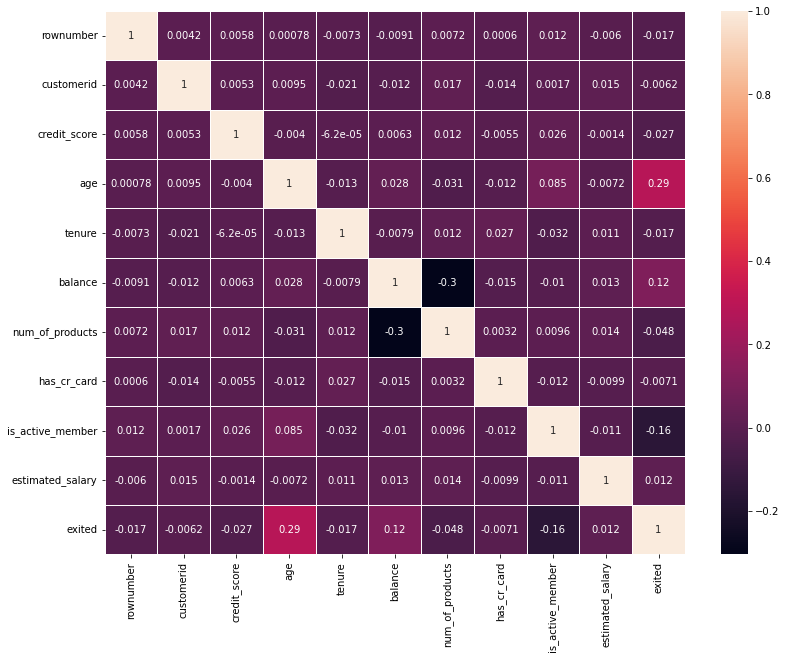

In [30]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(13,10)) 
sns.heatmap(corr, annot=True, linewidth=0.5, ax=ax)

Перед подготовкой признаков к обучению моделей заполним отсутствующие значения в столбце с информацией о сроке использования клиентом банковских продуктов. Для начала посмотрим общую информацию по ним и сравним с распределением значений по всему датасету

In [31]:
display(data.describe(include='all').transpose())
display(data[data['tenure'].isna() == True].describe(include='all').transpose())

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
rownumber,"10,000.0",NaN,NaN,NaN,"5,000.5","2,886.9",1.0,"2,500.8","5,000.5","7,500.2","10,000.0"
customerid,"10,000.0",NaN,NaN,NaN,"15,690,940.6","71,936.2","15,565,701.0","15,628,528.2","15,690,738.0","15,753,233.8","15,815,690.0"
surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
credit_score,"10,000.0",NaN,NaN,NaN,650.5,96.7,350.0,584.0,652.0,718.0,850.0
geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,"10,000.0",NaN,NaN,NaN,38.9,10.5,18.0,32.0,37.0,44.0,92.0
tenure,"9,091.0",NaN,NaN,NaN,5.0,2.9,0.0,2.0,5.0,7.0,10.0
balance,"10,000.0",NaN,NaN,NaN,"76,485.9","62,397.4",0.0,0.0,"97,198.5","127,644.2","250,898.1"
num_of_products,"10,000.0",NaN,NaN,NaN,1.5,0.6,1.0,1.0,1.0,2.0,4.0


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
rownumber,909.0,NaN,NaN,NaN,"4,866.4","2,909.6",31.0,"2,311.0","4,887.0","7,306.0","10,000.0"
customerid,909.0,NaN,NaN,NaN,"15,689,814.6","75,112.3","15,565,806.0","15,626,578.0","15,686,870.0","15,756,804.0","15,815,690.0"
surname,909,665,Hughes,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
credit_score,909.0,NaN,NaN,NaN,648.5,99.1,359.0,580.0,647.0,718.0,850.0
geography,909,3,France,464,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,909,2,Male,483,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,909.0,NaN,NaN,NaN,38.6,9.8,18.0,32.0,37.0,43.0,92.0
tenure,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,909.0,NaN,NaN,NaN,"76,117.3","63,105.7",0.0,0.0,"96,674.6","128,555.0","206,663.8"
num_of_products,909.0,NaN,NaN,NaN,1.5,0.6,1.0,1.0,1.0,2.0,4.0


Никаких отклонений по сравнению с остальным датасетом не наблюдается- количественные признаки в обоих случаях распределены одинаково. Следовательно, ошибка сохранения данных в данном столбце не зависит от каких-то параметров и распределяется случайно. Теперь рассмотрим, как распределяются значения целевого признака в зависимости от срока использования клиентом банковских продуктов.

In [32]:
data.groupby(by='tenure')['exited'].mean()

tenure
0.0    0.2
1.0    0.2
2.0    0.2
3.0    0.2
4.0    0.2
5.0    0.2
6.0    0.2
7.0    0.2
8.0    0.2
9.0    0.2
10.0   0.2
Name: exited, dtype: float64

Можем сделать вывод, что срок использования банковских продуктов не оказывает влияния на решение клиента об уходе- для всех значений от 0 до 10 лет количество ушедших клиентов одинаковое и составляет 20%. Таким образом, можем исключить данный признак из обучающего набора данных, не заполняя пропуски в нем.

Далее подготовим данные для обучения моделей- преобразуем категориальные признаки техникой OHE, после чего масштабируем все признаки. Для проверки точности обучаемых моделей сформируем три разных обучающих набора данных- с учетом всех признаков, без учета предполагаемой заработной платы и без учета предполагаемой заработной платы с преобразованием данных о средствах на счете клиента в логический тип- есть ли средства на счете клиента. 

Сформируем обучающую, валидационную и тестовую выборки в соотношении 3:1:1.

In [33]:
# введем дополнительный признак, содержащий информацию о наличии у киента средств на счете
data['funds_on_balance'] = data['balance'] > 0
data['funds_on_balance'] = data['funds_on_balance'].astype('int')

In [34]:
# преобразуем категориальные признаки техникой OHE, избегая дамми-ловушки
data_ohe = data.drop(['rownumber', 'customerid', 'surname', 'tenure', 'exited'], axis=1)
data_ohe = pd.get_dummies(data_ohe, drop_first=True)

# сформируем обучающий набор данных, содержащий все признаки кроме номера строки, идентификатора клиента и его фамилии
features = data_ohe
target = data['exited']

# сформируем обучающую, валидационную и тестовую выборки, содержащие все признаки обучающего набора данных
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=12345)
features_train, features_valid, target_train, target_valid = train_test_split(features_train, target_train, test_size=0.25, random_state=12345)

# масштабируем признаки в выборках
numeric = ['credit_score', 'age', 'balance', 'num_of_products', 'estimated_salary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

# сформируем обучающий набор данных с оригинальными признаками датасета (без признака 'funds_on_balance')
original_train = features_train.drop(['funds_on_balance'], axis=1)
original_valid = features_valid.drop(['funds_on_balance'], axis=1)
original_test = features_test.drop(['funds_on_balance'], axis=1)

# сформируем обучающий набор данных без учета предполагаемой заработной платы
features_wos_train = original_train.drop(['estimated_salary'], axis=1)
features_wos_valid = original_valid.drop(['estimated_salary'], axis=1)
features_wos_test = original_test.drop(['estimated_salary'], axis=1)

# сформируем обучающий набор данных без учета предполагаемой заработной платы и с преобразованным признаком наличия средств на счете
features_wob_train = features_train.drop(['balance', 'estimated_salary'], axis=1)
features_wob_valid = features_valid.drop(['balance', 'estimated_salary'], axis=1)
features_wob_test = features_test.drop(['balance', 'estimated_salary'], axis=1)

C:\Users\79267\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


Рассмотрим результат разбиения на выборки. Для этого выведем на экран графики распределения количественных значений в выборках.

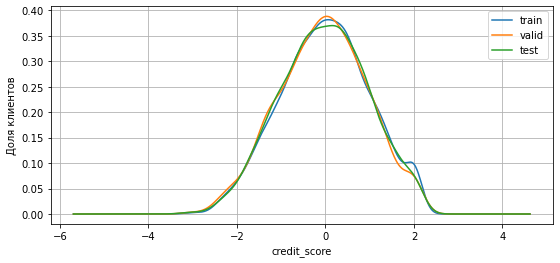

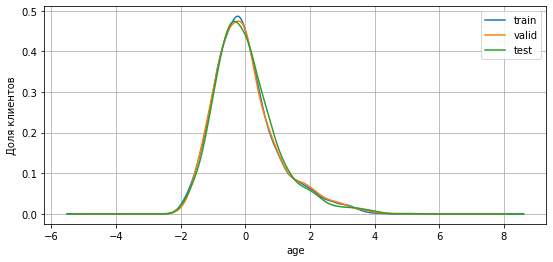

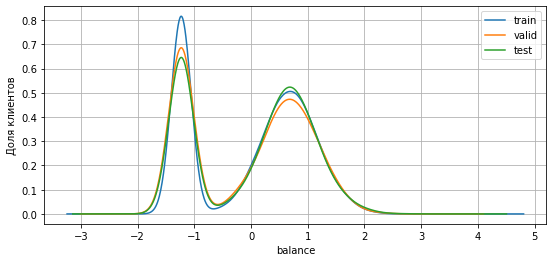

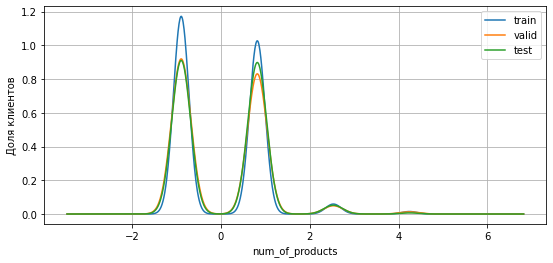

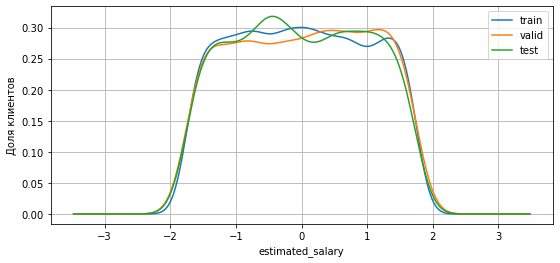

In [35]:
kwargs = {'kind':'kde', 'grid':True, 'figsize':(9,4), 'legend':'True'}
for names in numeric:
    ax = features_train[names].plot( **kwargs)
    features_valid[names].plot(**kwargs, ax=ax)
    features_test[names].plot(**kwargs, ax=ax)
    ax.legend(['train', 'valid', 'test'])
    plt.xlabel(names)
    plt.ylabel('Доля клиентов')
    plt.show()

Распределения значений в признаках схожи, из чего можем сделать вывод, что разбиение на выборки произвели корректно.

### Вывод

В данном разделе открыли и изучили данные об активности клиентов банка. Обнаружили проблему сохранения данных- у 9% клиентов отсутствует информация о времени использования банковских продуктов. Данная проблема не привязана к какому-то признаку и носит случайный характер.

При изучении распределения признаков выяснилось, что возраст, количество средств на счете и кредитный рейтинг имеют вид распределения, близкий к нормальному, однако также имеют то или иное количество выбросов. Наибольшее количество выбросов в столбце с балансом клиента. По этой причине ввели дополнительный признак- буллево значение, отображающее, есть ли средства на счете клиента. Отметили, что в столбце с информацией о предполагаемой заработной плате клиента распределение равномерное, что может негативно повлиять на точность предсказания модели.

Все категориальные признаки привели к количественным, используя технику OHE и избегая дамми-ловушки, после чего масштабировали признаки в обучающем наборе данных.

Разделили данные на обучающую, валидационную и тестовую выборки в соотношении 3:1:1 и создали три разных обучающих набора данных- со всеми признаками оригинального датасета, без учета предполагаемой заработной платы, без учета предполагаемой заработной платы и количества средств на счете клиента, но с учетом признака факта наличия средств.

## Исследование задачи

Первой протестируем модель логистической регрессии.

In [36]:
# создадим функцию, принимающую на вход признаки и целевые признаки обучающей и валидационной выборок
# и возвращающую F1-меру на обеих выборках
def log_reg_accuracy(features_train, features_valid, target_train, target_valid):
    model = LogisticRegression(random_state=12345, solver='liblinear', max_iter=10000)
    model.fit(features_train, target_train)
    train_predictions = model.predict(features_train)
    valid_predictions = model.predict(features_valid)
    return (f'на обучающей выборке: {f1_score(target_train, train_predictions): .3}, на валидационной выборке: {f1_score(target_valid, valid_predictions): .3}')

# выведем на экран значение F1-меры на разных наборах данных
print('F1-мера на оригинальном наборе данных', log_reg_accuracy(original_train, original_valid, target_train, target_valid))
print('Без учета предполагаемой заработной платы', log_reg_accuracy(features_wos_train, features_wos_valid, target_train, target_valid))
print('С преобразованным признаком средств на счете', log_reg_accuracy(features_wob_train, features_wob_valid, target_train, target_valid))

F1-мера на оригинальном наборе данных на обучающей выборке:  0.324, на валидационной выборке:  0.305
Без учета предполагаемой заработной платы на обучающей выборке:  0.33, на валидационной выборке:  0.305
С преобразованным признаком средств на счете на обучающей выборке:  0.318, на валидационной выборке:  0.313


Для всех обучающих наборов данных F1-мера имеет невысокое значение, едва превышая 0,3. Наибольшее значение на валидационной выборке показывает обучающий набор данных без учета предполагаемой заработной платы и с бинарным признаком наличия средств на счете клиента.

Далее протестируем модель ешающего дерева. В цикле подберем гиперпараметры, дающие наилучший результат.

In [37]:
# создадим функцию, принимающую на вход признаки и целевые признаки обучающей и валидационной выборок
# и возвращающую F1-меру на обеих выборках и глубину дерева
def des_tree_accuracy(features_train, features_valid, target_train, target_valid):
    for depth in (1, len(features_train.columns)):
        best_result = 0
        model = DecisionTreeClassifier(max_depth = depth, random_state=12345)
        model.fit(features_train, target_train)
        predictions_valid = model.predict(features_valid)
        score = f1_score(predictions_valid, target_valid)
        if score > best_result:
            best_result = score
            best_model = model
            best_depth = depth
    train_predictions = best_model.predict(features_train)
    valid_predictions = best_model.predict(features_valid)
    return (f'на обучающей выборке: {f1_score(target_train, train_predictions): .3}, на валидационной выборке: {f1_score(target_valid, valid_predictions): .3}, глубина дерева: {best_depth}')

# выведем на экран значение F1-меры на разных наборах данных
print('F1-мера на оригинальном наборе данных', des_tree_accuracy(original_train, original_valid, target_train, target_valid))
print('Без учета предполагаемой заработной платы', des_tree_accuracy(features_wos_train, features_wos_valid, target_train, target_valid))
print('С преобразованным признаком средств на счете', des_tree_accuracy(features_wob_train, features_wob_valid, target_train, target_valid))

F1-мера на оригинальном наборе данных на обучающей выборке:  0.743, на валидационной выборке:  0.539, глубина дерева: 10
Без учета предполагаемой заработной платы на обучающей выборке:  0.694, на валидационной выборке:  0.541, глубина дерева: 9
С преобразованным признаком средств на счете на обучающей выборке:  0.668, на валидационной выборке:  0.552, глубина дерева: 9


Модель решающего дерева показывает лучший результат по сравнению с моделью логистической регрессии. F1-мера снова выше на обучающем наборе с бинарным признаком наличия средств на счете клиента и составляет 0,552.

Далее протестируем модель случайного леса, в которой в цикле определим наилучшее количество деревьев и максимальную глубину.

In [38]:
# создадим функцию, принимающую на вход признаки и целевые признаки обучающей и валидационной выборок
# и возвращающую F1-меру на обеих выборках, глубину дерева и количество деревьев
def rand_forest_accuracy(features_train, features_valid, target_train, target_valid):
    for est in range(20, 101, 20):
        for depth in (1, len(features_train.columns)):
            best_result = 0
            model = RandomForestClassifier(max_depth = depth, n_estimators = est, random_state=12345)
            model.fit(features_train, target_train)
            predictions_valid = model.predict(features_valid)
            score = f1_score(predictions_valid, target_valid)
            if score > best_result:
                best_model = model
                best_depth = depth
                best_est = est
    train_predictions = model.predict(features_train)
    valid_predictions = model.predict(features_valid)
    return (f'на обучающей выборке: {f1_score(target_train, train_predictions): .3}, на валидационной выборке: {f1_score(target_valid, valid_predictions): .3}, количество деревьев: {best_est}, глубина: {best_depth}')
# выведем на экран значение F1-меры на разных наборах данных
print('F1-мера на оригинальном наборе данных', rand_forest_accuracy(original_train, original_valid, target_train, target_valid))
print('Без учета предполагаемой заработной платы', rand_forest_accuracy(features_wos_train, features_wos_valid, target_train, target_valid))
print('С преобразованным признаком средств на счете', rand_forest_accuracy(features_wob_train, features_wob_valid, target_train, target_valid))

F1-мера на оригинальном наборе данных на обучающей выборке:  0.708, на валидационной выборке:  0.555, количество деревьев: 100, глубина: 10
Без учета предполагаемой заработной платы на обучающей выборке:  0.673, на валидационной выборке:  0.545, количество деревьев: 100, глубина: 9
С преобразованным признаком средств на счете на обучающей выборке:  0.647, на валидационной выборке:  0.548, количество деревьев: 100, глубина: 9


Модель случайного леса показывает результат, аналогичный модели решающего дерева. Здесь наибольшее значение F1 составляет 0,555 на оригинальном наборе данных.

### Вывод

В данном разделе произвели обучение моделей логистической регрессии, дерева решений и случайного леса с определением оптимальных гиперпараметров на созданных ранее обучающих наборах данных, включающих в себя разхличные наборы признаков. Наилучший результат на валидационной выборке показала модель случайного леса на оригинальном наборе данных. F1-мера в данном случае составила 0,555. Следует отметить, что все три модели показали невысокие результаты, вызванные, скорее всего, дисбалансом целевого признака- ушедших из банка клиентов в 4 раза меньше, чем остальных. В следующих разделах избавимся от дисбаланса и протестируем модели снова.

## Борьба с дисбалансом

С целью улучшения предсказаний моделей увеличим выборку, убрав таким образом дисбаланс целевого признака. Отделим положительные значения целевого признака от отрицательных, увеличим выборку в 4 раза, объединим обратно и перемешаем объекты.

In [39]:
# создадим функцию увеличения выборки по положительному целевому признаку
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

# сформируем обучающий набор данных с оригинальными признаками датасета (без признака 'funds_on_balance')
original_upsampled = features_upsampled.drop(['funds_on_balance'], axis=1)

# сформируем обучающий набор данных без учета предполагаемой заработной платы
features_wos_upsampled = original_upsampled.drop(['estimated_salary'], axis=1)

# сформируем обучающий набор данных без учета предполагаемой заработной платы и с преобразованным признаком наличия средств на счете
features_wob_upsampled = features_upsampled.drop(['balance', 'estimated_salary'], axis=1)

Аналогично разделу 2 протестируем модели логистической регрессии, решающего дерева и случайного леса с перебором гиперпараметров и выделением лучшего результата по F1-мере на валидационной выборке.

In [40]:
# выведем на экран значение F1-меры на модели логистической регрессии
print('Модель логистической регрессии')
print('F1-мера на оригинальном наборе данных', log_reg_accuracy(original_upsampled, original_valid, target_upsampled, target_valid))
print('Без учета предполагаемой заработной платы', log_reg_accuracy(features_wos_upsampled, features_wos_valid, target_upsampled, target_valid))
print('С преобразованным признаком средств на счете', log_reg_accuracy(features_wob_upsampled, features_wob_valid, target_upsampled, target_valid))
print('-' * 100)

# выведем на экран значение F1-меры на модели решающего дерева
print('Модель решающего дерева')
print('F1-мера на оригинальном наборе данных', des_tree_accuracy(original_upsampled, original_valid, target_upsampled, target_valid))
print('Без учета предполагаемой заработной платы', des_tree_accuracy(features_wos_upsampled, features_wos_valid, target_upsampled, target_valid))
print('С преобразованным признаком средств на счете', des_tree_accuracy(features_wob_upsampled, features_wob_valid, target_upsampled, target_valid))
print('-' * 100)

# выведем на экран значение F1-меры на модели случайного леса
print('Модель случайного леса')
print('F1-мера на оригинальном наборе данных', rand_forest_accuracy(original_upsampled, original_valid, target_upsampled, target_valid))
print('Без учета предполагаемой заработной платы', rand_forest_accuracy(features_wos_upsampled, features_wos_valid, target_upsampled, target_valid))
print('С преобразованным признаком средств на счете', rand_forest_accuracy(features_wob_upsampled, features_wob_valid, target_upsampled, target_valid))
print('-' * 100)

Модель логистической регрессии
F1-мера на оригинальном наборе данных на обучающей выборке:  0.707, на валидационной выборке:  0.48
Без учета предполагаемой заработной платы на обучающей выборке:  0.709, на валидационной выборке:  0.482
С преобразованным признаком средств на счете на обучающей выборке:  0.709, на валидационной выборке:  0.482
----------------------------------------------------------------------------------------------------
Модель решающего дерева
F1-мера на оригинальном наборе данных на обучающей выборке:  0.87, на валидационной выборке:  0.493, глубина дерева: 10
Без учета предполагаемой заработной платы на обучающей выборке:  0.843, на валидационной выборке:  0.538, глубина дерева: 9
С преобразованным признаком средств на счете на обучающей выборке:  0.831, на валидационной выборке:  0.537, глубина дерева: 9
----------------------------------------------------------------------------------------------------
Модель случайного леса
F1-мера на оригинальном наборе данны

Лучший результат- у модели случайного леса без учета предполагаемой заработной платы клиента. Примем окончательно модель случайного леса с глубиной дерева 9 и количеством деревьев 100. 

Уменьшим выборку по отрицательному классу в 4 раза и аналогично рассчитаем F1-меру.

In [41]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

# сформируем обучающий набор данных с оригинальными признаками датасета (без признака 'funds_on_balance')
original_downsampled = features_downsampled.drop(['funds_on_balance'], axis=1)

# сформируем обучающий набор данных без учета предполагаемой заработной платы
features_wos_downsampled = original_downsampled.drop(['estimated_salary'], axis=1)

# сформируем обучающий набор данных без учета предполагаемой заработной платы и с преобразованным признаком наличия средств на счете
features_wob_downsampled = features_downsampled.drop(['balance', 'estimated_salary'], axis=1)

In [42]:
# выведем на экран значение F1-меры на модели логистической регрессии
print('Модель логистической регрессии')
print('F1-мера на оригинальном наборе данных', log_reg_accuracy(original_downsampled, original_valid, target_downsampled, target_valid))
print('Без учета предполагаемой заработной платы', log_reg_accuracy(features_wos_downsampled, features_wos_valid, target_downsampled, target_valid))
print('С преобразованным признаком средств на счете', log_reg_accuracy(features_wob_downsampled, features_wob_valid, target_downsampled, target_valid))
print('-' * 100)

# выведем на экран значение F1-меры на модели решающего дерева
print('Модель решающего дерева')
print('F1-мера на оригинальном наборе данных', des_tree_accuracy(original_downsampled, original_valid, target_downsampled, target_valid))
print('Без учета предполагаемой заработной платы', des_tree_accuracy(features_wos_downsampled, features_wos_valid, target_downsampled, target_valid))
print('С преобразованным признаком средств на счете', des_tree_accuracy(features_wob_downsampled, features_wob_valid, target_downsampled, target_valid))
print('-' * 100)

# выведем на экран значение F1-меры на модели случайного леса
print('Модель случайного леса')
print('F1-мера на оригинальном наборе данных', rand_forest_accuracy(original_downsampled, original_valid, target_downsampled, target_valid))
print('Без учета предполагаемой заработной платы', rand_forest_accuracy(features_wos_downsampled, features_wos_valid, target_downsampled, target_valid))
print('С преобразованным признаком средств на счете', rand_forest_accuracy(features_wob_downsampled, features_wob_valid, target_downsampled, target_valid))
print('-' * 100)

Модель логистической регрессии
F1-мера на оригинальном наборе данных на обучающей выборке:  0.713, на валидационной выборке:  0.482
Без учета предполагаемой заработной платы на обучающей выборке:  0.713, на валидационной выборке:  0.48
С преобразованным признаком средств на счете на обучающей выборке:  0.71, на валидационной выборке:  0.482
----------------------------------------------------------------------------------------------------
Модель решающего дерева
F1-мера на оригинальном наборе данных на обучающей выборке:  0.898, на валидационной выборке:  0.504, глубина дерева: 10
Без учета предполагаемой заработной платы на обучающей выборке:  0.865, на валидационной выборке:  0.521, глубина дерева: 9
С преобразованным признаком средств на счете на обучающей выборке:  0.851, на валидационной выборке:  0.511, глубина дерева: 9
----------------------------------------------------------------------------------------------------
Модель случайного леса
F1-мера на оригинальном наборе данны

При уменьшении выборки по отрицательному целевому признаку существенно сокращается количество данных для обучения модели, в связи с чем она хуже обучается и показывает меньшее значение F1, поэтому выбранную модель оставим прежней- с увеличением выборки по целевому признаку и исключая предполагаемый доход клиента.

Проверим точность модели AdaBoost на сбалансированной с увеличением положительного признака выборке с набором признаков без учета предполагаемой заработной платы. В цикле подберем наилучшие гиперпараметры для данной модели, сравнивая f1-меру.

In [53]:
for est in range(1, 51):
    best_abm_score = 0
    abm = AdaBoostClassifier(n_estimators=est, random_state=12345)
    abm.fit(features_wos_upsampled, target_upsampled)
    valid_predictions = abm.predict(features_wos_valid)
    score = f1_score(valid_predictions, target_valid)
    if best_abm_score < score:
        best_abm_score = score
        best_est = est
print(f'F1-мера модели AdaBoost составляет {best_abm_score: .3}, n_estimators={best_est}')

F1-мера модели AdaBoost составляет  0.566, n_estimators=50


Модель AdaBoost показывает результат хуже, чем результат модели случайного леса, поэтому финально выбираем модель слуайного леса.

Перед тестированием выбранной модели проверим ее адекватность на константной модели и на модели, возввращающей случайное значение целевого признака.

In [43]:
check_columns = pd.DataFrame(np.random.randint(0, 2, size=(len(target_valid), 1)), columns=['random'])
check_columns['only_true'] = 1
print(f'F1-мера со случайными значениями признака составляет {f1_score(target_valid, check_columns["random"]): .3}')
print(f'F1-мера на константной модели составляет {f1_score(target_valid, check_columns["only_true"]): .3}')

F1-мера со случайными значениями признака составляет  0.294
F1-мера на константной модели составляет  0.327


### Вывод

В данном разделе увеличили выборку по положительным значениям целевого признака в 4 раза с целью борьбы с дисбалансом. Аналогично предыдущим разделам создали три набора обучающих данных и обучили на них модели- с признаками оригинального датасета, без учета предполагаемой заработной платы и то же самое, но с представлением признака, содержащего информацию о количестве средств на счете клиента, в бинарном виде. Наилучший результат показала модель случайного леса на обучающем наборе данных без учета предполагаемого дохода клиента со 100 деревьями максимальной глубиной 9. F1-мера выбранной модели на валидационной выборке составила 0,594. Для проверки адекватности выбранной модели F1-мера была определена для константной модели и для модели, возвращающей случайное значение целевого признака. Обе модели показали существенно меньшее значение F1-меры, поэтому можем сделать вывод, что модель адекватна. Далее проверим модель на тестовой выборке.

## Тестирование модели

Обучим модель случайного леса со 100 деревьями максимальной глубиной 9 на обучающей выборке без учета предполагаемой заработной платы клиента и выведем на экран значение F1-меры, а также построим AUC-ROC кривую, вычислив площадь под ней.

F1-мера выбранной модели на тестовой выборке составляет  0.631
AUC-ROC =  0.869


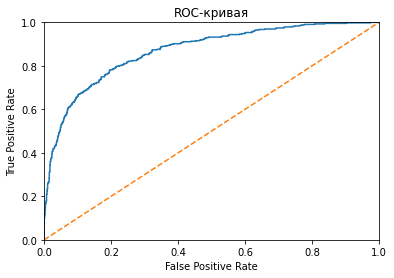

In [44]:
model = RandomForestClassifier(max_depth = 9, n_estimators = 100, random_state = 12345)
model.fit(features_wos_upsampled, target_upsampled)
predictions = model.predict(features_wos_test)
print(f'F1-мера выбранной модели на тестовой выборке составляет {f1_score(target_test, predictions): .3}')


probabilities_test = model.predict_proba(features_wos_test)
probabilities_one_test = probabilities_test[:, 1]

print(f'AUC-ROC = {roc_auc_score(target_test, probabilities_one_test): .3}')

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

### Вывод

В данном разделе рассчитали F1-меру и площадь под ROC для выбранной модели на тестовой выборке. F1-мера на тестовой выборке превосходит значение на валидационной выборке и составляет 0,631. Условием проекта было достижение значения F1-меры 0,59. Таким образом, можем считать, что цель проекта достигнута. Площадь под ROC составляет 0,869, что говорит о хорошей предсказательной способности модели.

## Общие выводы

Целью проекта было обучение модели для определения вероятности ухода клиентов банка на основе их поведения. При открытии данных были обнаружены некоторые проблемы: для 9% пользователей нет информации об их времени пользования банком, предполагаемый доход клиентов распределяется равномерно и в описании проекта не сказано, по какому алгоритму он определяется. В связи с тем, что процент ушедших клиентов не меняется в зависимости от срока их пользования банком, было решено исключить этот признак из оцениваемых параметров.

При обучении моделей обучающий набор данных был разделен на обучающую, валидационную и тестовую выборки в соотношении 3:1:1. Далее были обучены модели логистической регрессии, дерева решений и случайного леса с перебором гиперпараметров для двух последних. Во всех случаях была получена F1-мера на обучающей и валидационной выборках, значение которой не удовлетворяло условиям выполнения проекта. В связи с этим было решено увеличить выборку по положительным значениям целевого признака и заново обучить те же модели. Окончательно выбранной моделью стала модель случайного леса со 100 деревьями максимальной глубиной 9 на выборке без учета предполагаемого дохода клиента. F1-мера для обучающей выборки на данной модели составила 0,86, на валидационной- 0,594, на тестовой- 0,631. Данное значение удовлетворяет условиям выполнения проекта. Также была построена ROC и определена площадь под ней. Площадь составила 0,869, что говорит о хорошей предсказательной способности модели.

Таким образом, проект можно считать выполненным.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*